# Clustering Basics

The data set contains all of the results of roll call votes from the 114th Senate. Each row represents a single Senator, and each column represents a vote. A 0 in a cell means the Senator voted No on the bill, 1 means the Senator voted Yes, and 0.5 means the Senator abstained. Here are the relevant columns:
- `name` -- The last name of the Senator.
- `party` -- the party of the Senator. The valid values are D for Democrat, R for Republican, and I for Independent.
- Several columns numbered like `00001`, `00004`, etc. Each of these columns represents the results of a single roll call vote.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

### Exploring the Data

In [4]:
votes = pd.read_csv("114_congress.csv")

In [5]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [6]:
votes['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [7]:
votes.mean()

00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

### Finding the distance between senators

In [16]:
# distance between first and third senators
distance = euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[2,3:].values.reshape(1, -1))
distance

array([[3.31662479]])

### k-means clustering

In [25]:
km = KMeans(n_clusters=2, random_state=1)
senator_distances = km.fit_transform(votes.iloc[:,3:])
senator_distances

array([[3.12141628, 1.3134775 ],
       [2.6146248 , 2.05339992],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [1.43833966, 2.96866004],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [0.31287498, 3.30758755],
       [0.33960656, 3.41651746],
       [3.27058526, 0.96734144],
       [0.33960656, 3.41651746],
       [3.34875646, 0.53945585],
       [0.33960656, 3.41651746],
       [1.18084816, 3.12695614],
       [1.23852221, 3.13536063],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [2.6146248 , 2.05339992],
       [0.58487332, 3.31421108],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.56324683, 0.93036231],
       [3.42004795, 0.24198446],
       [1.73847904, 2.82326711],
       [0.33960656, 3.41651746],
       [3.

In [23]:
labels = km.labels_
print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [26]:
democratic_outliers = votes[(labels == 1) & (votes["party"] == "D")]
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


### Visualizing Clusters

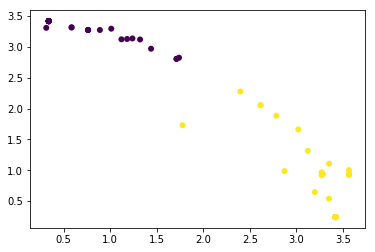

In [30]:
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels, linewidths=0)
plt.show()

### Finding extremist senators

In [31]:
extremism = (senator_distances ** 3).sum(axis=1)
votes["extremism"] = extremism
votes.sort_values("extremism", inplace=True, ascending=False)

In [32]:
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
